In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/diabetes_dataset.csv')

# Display the dataset's basic info and the first few rows
print("Dataset Information:")
data.info()
print("\nFirst Few Rows:")
data.head()

# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
data.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

First Few Rows:

Missing Values Summary:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                        

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling Missing Values
# Fill missing values with mean for numerical columns, if any
data.fillna(data.mean(), inplace=True)

# Check for categorical variables and encode them if present
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Scaling numerical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Display processed data sample
print("\nProcessed Data Sample:")
data.head()



Processed Data Sample:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896



Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose             

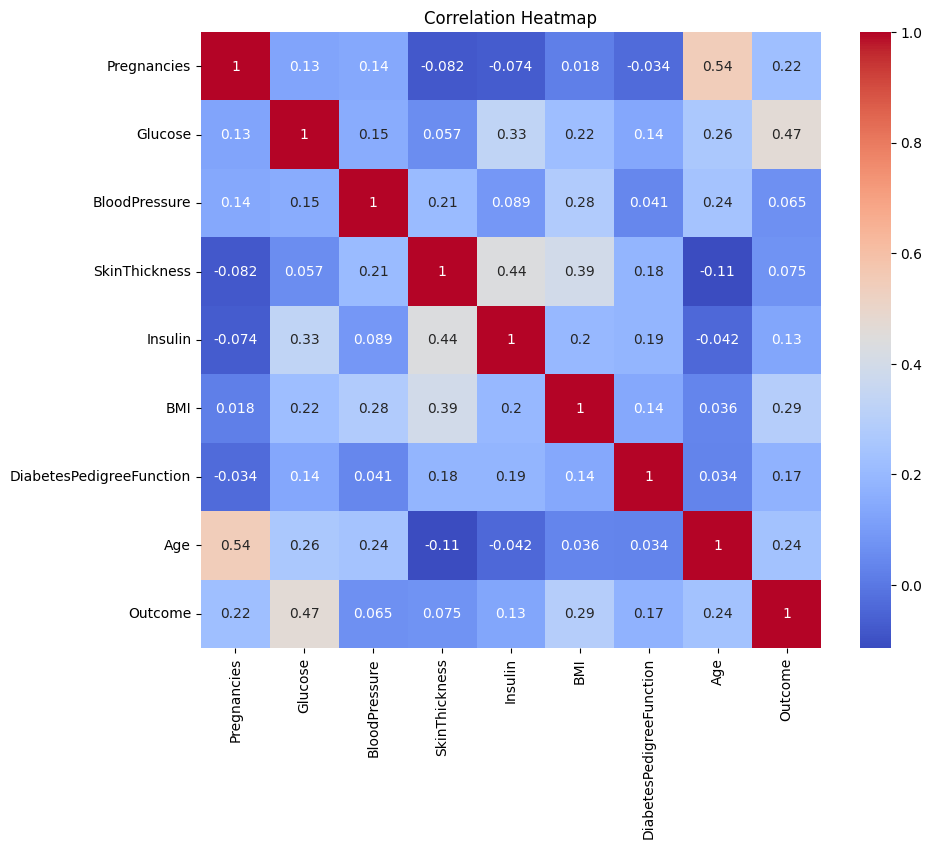


Explained Variance Ratio of PCA Components:
[0.26138907 0.19714578 0.12446946 0.09799499 0.09384705 0.08165203
 0.05426927 0.04646457]

PCA Transformed Data Sample:
[[ 1.75694707  1.11174258 -0.20879141  0.3337052  -0.48170797 -0.4330024
   0.45765868  1.1244104 ]
 [-1.50742148 -0.55940565  0.65062767  0.22993369  0.00488756 -0.11931068
   0.36646786  0.8524427 ]
 [ 0.65082201  1.92957633 -2.00774026 -0.02612904 -0.23405569  0.67404439
   0.72147461 -0.79335851]
 [-1.58739782 -1.06507465  0.47444201 -0.58065351  0.29742864 -0.07089661
   0.3447498  -0.03062391]
 [ 2.48337392 -2.35956252 -2.92551481  3.93661132 -1.56635008 -0.20039733
  -0.81513091  0.39870524]]


In [3]:
from sklearn.decomposition import PCA
import numpy as np

# Check for correlation among numerical features
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot heatmap if needed
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Apply PCA for dimensionality reduction
# Setting number of components to explain at least 95% of the variance
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data)

# Check the explained variance ratio
print("\nExplained Variance Ratio of PCA Components:")
print(pca.explained_variance_ratio_)

# Display the transformed dataset (first few rows)
print("\nPCA Transformed Data Sample:")
print(data_pca[:5, :])


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = data_pca  # Features from PCA
y = data['Outcome']  # Replace 'Outcome' with the correct target column name if different

# Ensure target variable is binary
# Convert target to integers if it contains float values like 1.0 and 0.0
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        80

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       151
           1       1.00      0.97      0.99        80

    accuracy                           0.99       231
   macro avg       0.99      0.99      0.99       231
weighted avg       0.99      0.99      0.99       231


SVM Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       151
           1       1.00      0.99      0.99        80

    accuracy                           1.00       231
   macro avg       1.00      0.99      1.00      

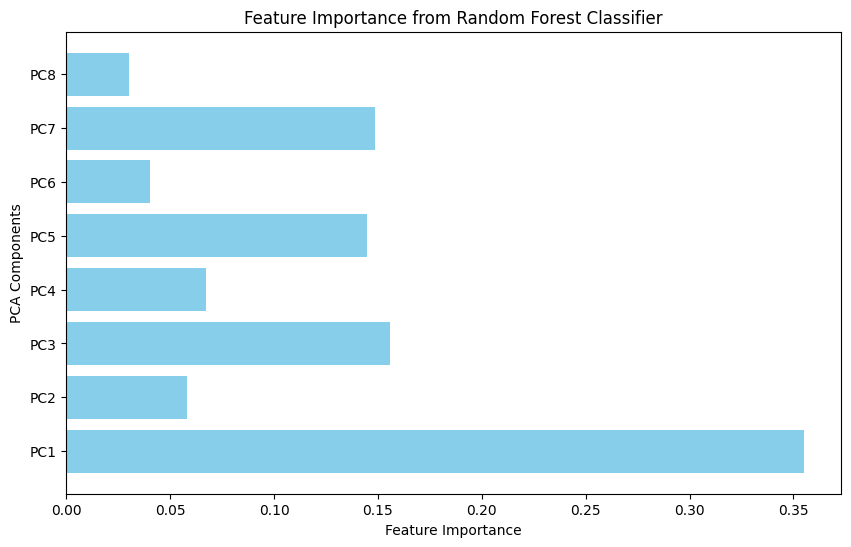

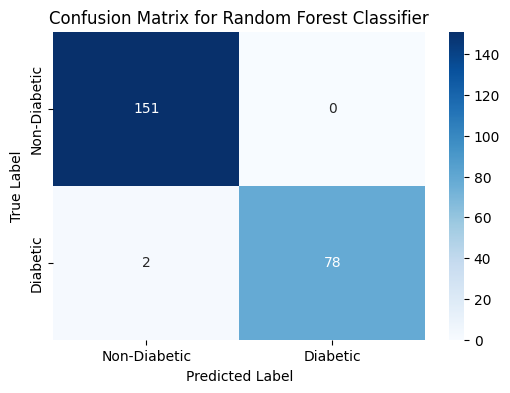

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Display feature importance for Random Forest
# This assumes Random Forest performed well; adjust if another model performs better.
feature_importance = rf.feature_importances_
pca_features = [f'PC{i+1}' for i in range(data_pca.shape[1])]  # Naming PCA components as PC1, PC2, etc.

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(pca_features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("PCA Components")
plt.title("Feature Importance from Random Forest Classifier")
plt.show()

# Confusion Matrix for the best model (Random Forest in this case)
y_pred_best = y_pred_rf  # Replace with the predictions of the best-performing model

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


In [7]:
import joblib

# Save the best model - Random Forest Classifier in this example
joblib.dump(rf, 'final_random_forest_model_kdd.joblib')

# To load the model later, use the following code:
# rf_loaded = joblib.load('final_random_forest_model_kdd.joblib')


['final_random_forest_model_kdd.joblib']